#Customer classification

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from google.colab import runtime

In [2]:
#Mounting our google drive on google colab to access our data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#load the dataset
filepath1 = '/content/drive/MyDrive/digital-transformation-in-banking-sector/Data/dataset1.csv'
filepath2 = '/content/drive/MyDrive/digital-transformation-in-banking-sector/Data/dataset2.csv'
cust_data1=pd.read_csv(filepath1)
cust_data2 = pd.read_csv(filepath2)
display(cust_data1.head(5))
display(cust_data2.head(5))

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [8]:
if(cust_data1.shape[0] == cust_data2.shape[0]):
  cust_data=cust_data1.merge(cust_data2, how='inner', on='ID') # Merging datasets
else:
  print('Data cannot be merged')
  runtime.unassign()

In [9]:
#shape of our fnal sataframe
cust_data.shape

(5000, 14)

In [10]:
#check data types
cust_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [11]:
cust_data.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [12]:
# Check for null value
cust_data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Target column LoanOnCard has some missing rows which can be dropped as missing values constitute to 0.4% & Id column does not contain any significant information so we can drop it

In [15]:
#drop null values & ID column
cust_data = cust_data.dropna()
cust_data = cust_data.drop(['ID'], axis = 1)

In [16]:
cust_data.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0


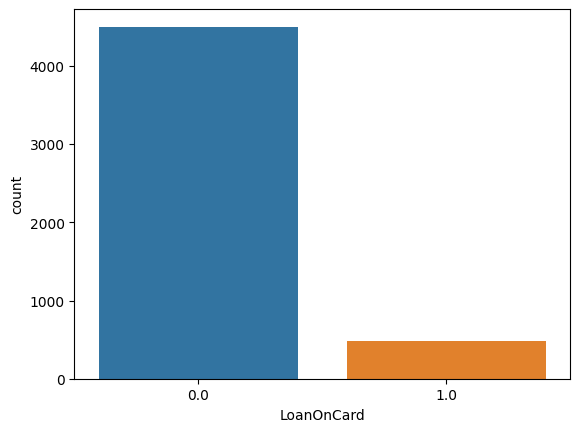

In [17]:
# Understand data distribution as per target class.
sns.countplot(x = 'LoanOnCard',  data = cust_data);

In [23]:
#calculate %age distribution of target class
count_1 = len(cust_data[cust_data['LoanOnCard'] == 1.0])
count_0 = len(cust_data[cust_data['LoanOnCard'] == 0.0])
print(f"Number of borrowers: {count_1} ({((count_1 / (count_1 + count_0)) * 100 )}%)")
print(f"Number of depositors: {count_0} ({((count_0 / (count_1 + count_0)) * 100)}%)")

Number of borrowers: 480 (9.63855421686747%)
Number of depositors cases: 4500 (90.36144578313254%)


As it can be observed ourdataset is highly imbalanced towards depositors.

<Axes: xlabel='HighestSpend', ylabel='MonthlyAverageSpend'>

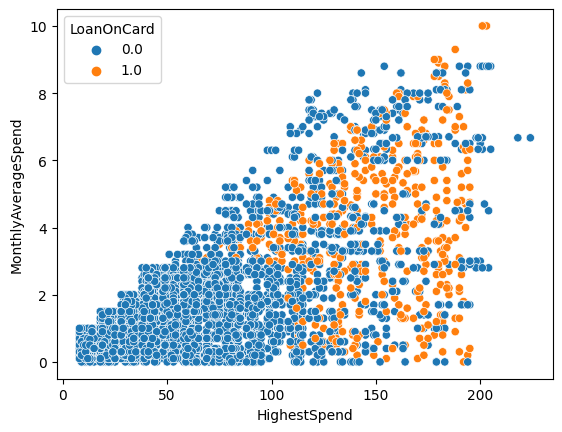

In [25]:
# Scatter plot to see how data points are distributed for "MonthlyAverageSpend" and "HighestSpend" as per target class
sns.scatterplot(x="HighestSpend", y="MonthlyAverageSpend", hue="LoanOnCard",
             data=cust_data,legend='full')
#g.set(xscale="log")

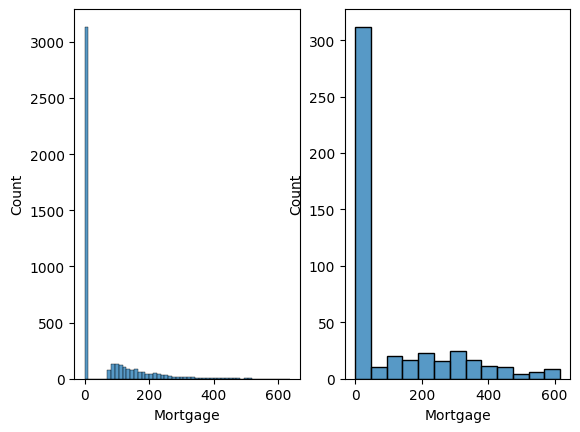

In [26]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
plt.show()

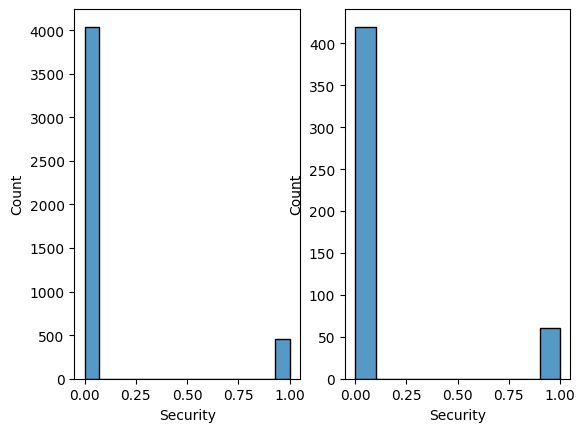

In [27]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'Security'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'Security'], ax = ax[1])
plt.show()

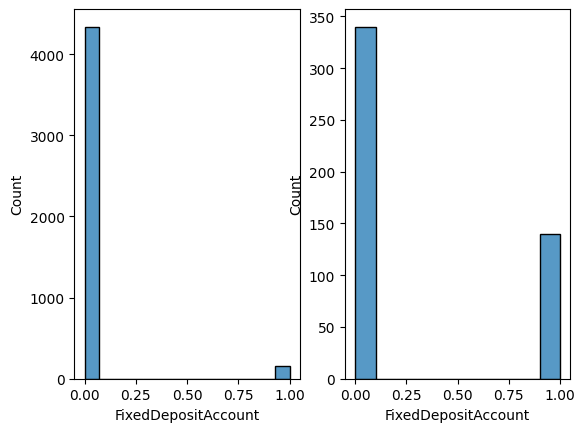

In [28]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'FixedDepositAccount'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'FixedDepositAccount'], ax = ax[1])
plt.show()

In the above histplots we can ignore bins at 0.00 values as it means that depositors/borrowers do not have Mortgage/Security/Fixed deposit with the bank

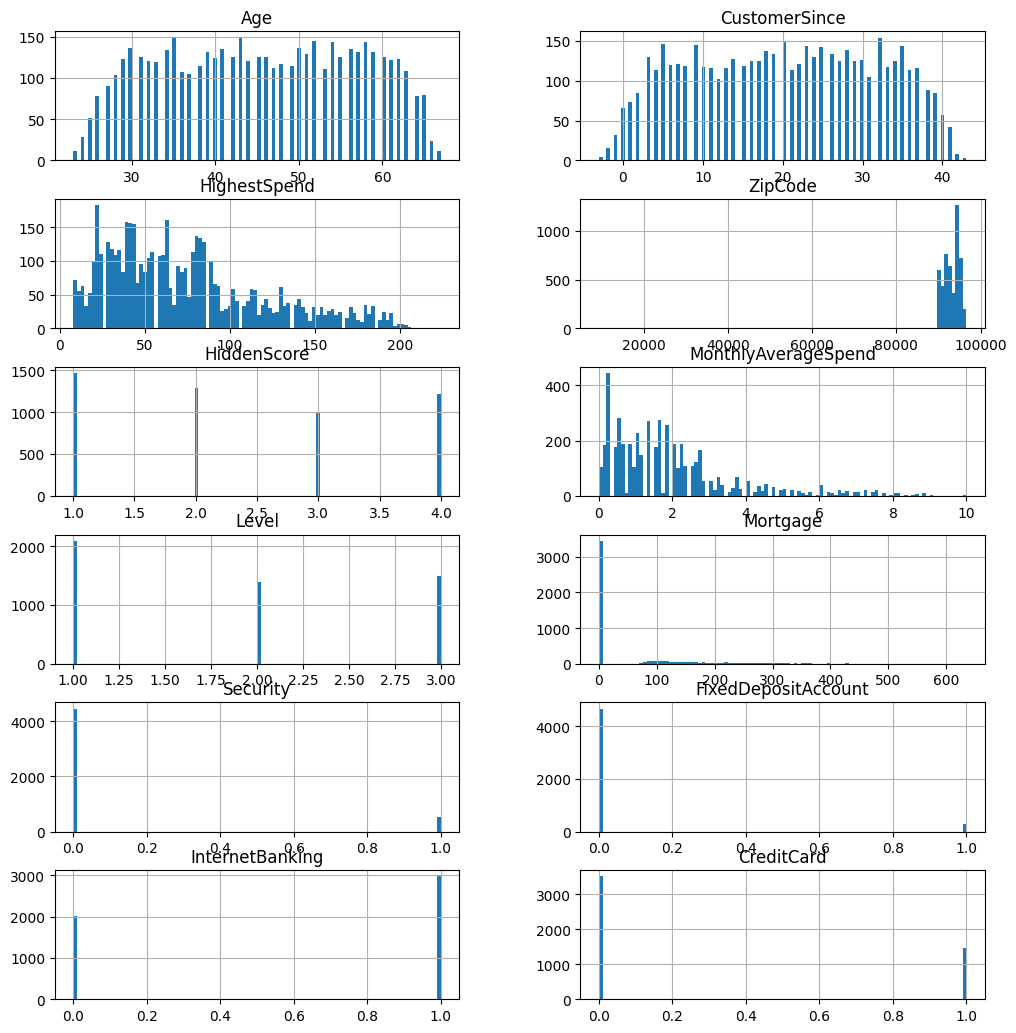

In [29]:
#Understand the bank customers by the features in our dataset(excuding target column)
columns = list(cust_data)[0:-1]
cust_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));